# K Means Clustering

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
new=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')

In [5]:
new.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Petal width (cm)')

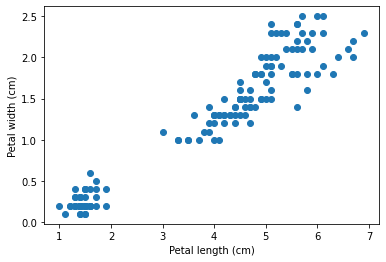

In [6]:
plt.scatter(new['petal length (cm)'],new['petal width (cm)'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scale=MinMaxScaler()
new['petal length']=scale.fit_transform(new[['petal length (cm)']])
new['petal width']=scale.fit_transform(new[['petal width (cm)']])

In [13]:
new.head()

,petal length (cm),petal width (cm),petal length,petal width
0,1.4,0.2,0.067797,0.041667
1,1.4,0.2,0.067797,0.041667
2,1.3,0.2,0.050847,0.041667
3,1.5,0.2,0.084746,0.041667
4,1.4,0.2,0.067797,0.041667


In [14]:
final=new.drop(['petal length (cm)','petal width (cm)'],axis='columns')
final.head()

,petal length,petal width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Text(0, 0.5, 'Petal width')

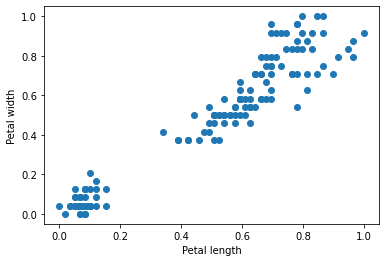

In [15]:
plt.scatter(final['petal length'],new['petal width'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [17]:
from sklearn.cluster import KMeans

In [43]:
sse=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(final)
    sse.append(km.inertia_)
sse    

[130.3416865530605,
 30.13646359004436,
 1.701874688192097,
 1.255538283416847,
 0.8535683225340074,
 0.6801035704886194,
 0.5656776810037092,
 0.48580845539143697,
 0.43838173471921876,
 0.365066529396104,
 0.33075117136869125,
 0.2965501679669907,
 0.26644853386562845,
 0.25206782026861485]

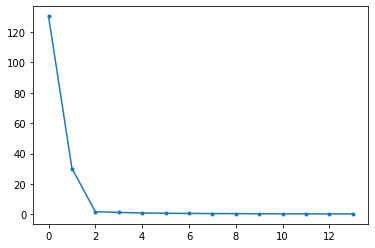

In [44]:
plt.plot(sse,marker='.')

In [22]:
model=KMeans(n_clusters=3)
pred=model.fit_predict(final)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
final['pred']=pred

In [24]:
final.head()

,petal length,petal width,pred
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [25]:
df1=final[final.pred==0]
df2=final[final.pred==1]
df3=final[final.pred==2]

Text(0, 0.5, 'Petal width')

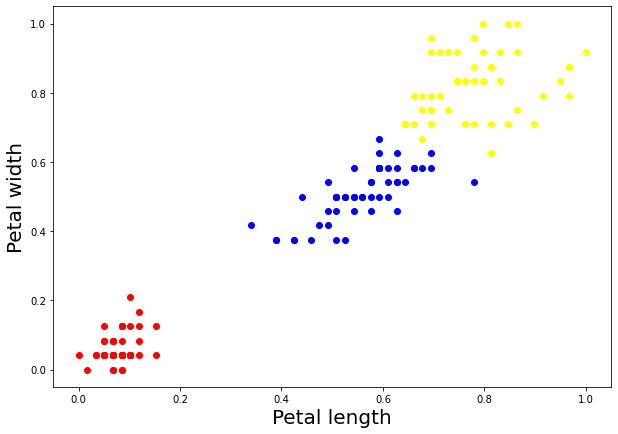

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(df1['petal length'],df1['petal width'],color='red')
plt.scatter(df2['petal length'],df2['petal width'],color='yellow')
plt.scatter(df3['petal length'],df3['petal width'],color='blue')
plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Petal width',fontsize=20)

In [36]:
model.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

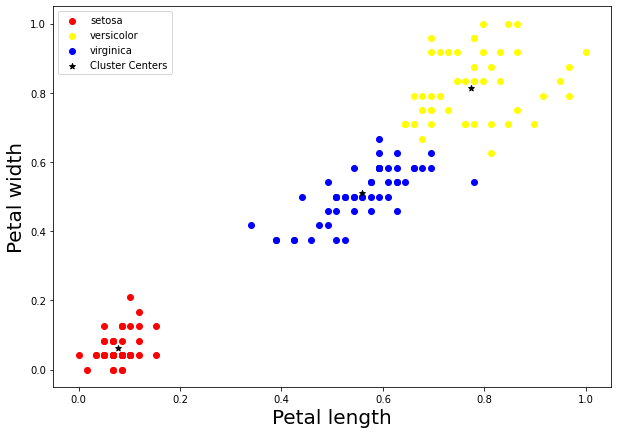

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(df1['petal length'],df1['petal width'],color='red',label=iris.target_names[0])
plt.scatter(df2['petal length'],df2['petal width'],color='yellow',label=iris.target_names[1])
plt.scatter(df3['petal length'],df3['petal width'],color='blue',label=iris.target_names[2])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*',color='black',label='Cluster Centers')
plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Petal width',fontsize=20)
plt.legend()